This notebook introduces the use of dictionaries for counting the frequency of some category of words in text, plotting the distribution of that category in tweets by Donald Trump through January 8, 2021 published by the [Trump Twitter archive](https://www.thetrumparchive.com/faq).

In [37]:
import json
import nltk
import pandas as pd
import matplotlib

In [38]:
# read in json file of tweets and return a list of (date, tokenized text)
def read_tweets_from_json(filename):
    
    tweets=[]
    with open(filename, encoding="utf-8") as file:
        data=json.load(file)
        for tweet in data:
            created_at=tweet["date"]
            date = pd.to_datetime(created_at)
            text=tweet["text"]
            tokens=nltk.casual_tokenize(text)
            tweets.append((date, tokens))
    return tweets

In [39]:
# read in list of (date, tokens) tweets and count whether each tweet contains 
# a (lowercased) term in the argument dictionary.  Return as pandas dataframe
# for easier slicing/plotting)
def dictionary_document_count(data, dictionary):
    counted=[]
    for date, tokens in data:
        val=0
        for word in tokens:
            if word.lower() in dictionary:
                val=1
        counted.append((date, val))
    df=pd.DataFrame(counted, columns=['date','document frequency'])
    return df

In [40]:
tweets=read_tweets_from_json("../data/trump_tweets_01-08-2021.json")

Here we'll define our own "immigration" dictionary by selecting words that we hypothesize are often found in the topic of immigration.

In [45]:
immigration_dictionary=set(["wall", "border", "borders", "immigrants","immigration"])

In [46]:
counts=dictionary_document_count(tweets, immigration_dictionary)

In [47]:
def plot_time(counts):
    
    # for this exercise, let's just keep tweets published after 2015
    counts=counts[(counts['date'] > '2015-01-01')]
    
    # counts is a pandas dataframe; let's aggregate the counts by month.  
    # Can also aggregate by "D" for day, "W" for week, "Y" for year.
    means=counts.resample('M', on='date').mean() 
    
    means.plot()

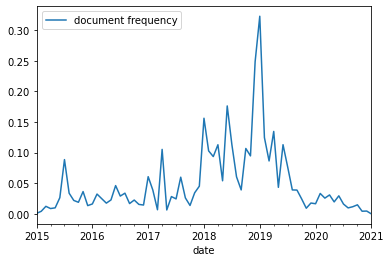

In [48]:
# You might need to run this command twice if you get a warning
plot_time(counts)

Create a new dictionary of your own for a concept you'd like to measure and plot its distribution over time (as in the example above).  How would you assess the **construct validity** of that dictionary?